In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

57026/57026 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim =13, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation="linear")) # for output

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Early stopping
es = EarlyStopping(monitor='val_loss', verbose = 0, mode = "auto")

model.fit(
  train_data,
  train_targets,
  epochs=150,
  validation_split=0.2,
  callbacks=es
)

Epoch 1/150
11/11 [==============================] - 4s 53ms/step - loss: 528.8873 - mae: 21.0405 - val_loss: 518.1823 - val_mae: 20.8872
Epoch 2/150
11/11 [==============================] - 0s 18ms/step - loss: 378.5381 - mae: 17.1248 - val_loss: 288.5397 - val_mae: 14.6895
Epoch 3/150
11/11 [==============================] - 0s 25ms/step - loss: 156.3859 - mae: 10.2721 - val_loss: 66.3322 - val_mae: 6.2168
Epoch 4/150
11/11 [==============================] - 0s 30ms/step - loss: 76.5791 - mae: 6.6047 - val_loss: 41.3440 - val_mae: 5.0521
Epoch 5/150
11/11 [==============================] - 0s 23ms/step - loss: 46.2556 - mae: 4.8957 - val_loss: 35.2245 - val_mae: 4.3086
Epoch 6/150
11/11 [==============================] - 0s 17ms/step - loss: 41.2152 - mae: 4.4594 - val_loss: 21.6664 - val_mae: 3.4404
Epoch 7/150
11/11 [==============================] - 0s 28ms/step - loss: 30.1952 - mae: 4.1370 - val_loss: 19.9153 - val_mae: 3.3230
Epoch 8/150
11/11 [==============================] -

In [ ]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std


In [ ]:
y_predict = model.predict(test_data)

4/4 [==============================] - 0s 6ms/step


In [ ]:
y_predict.shape

(102, 1)

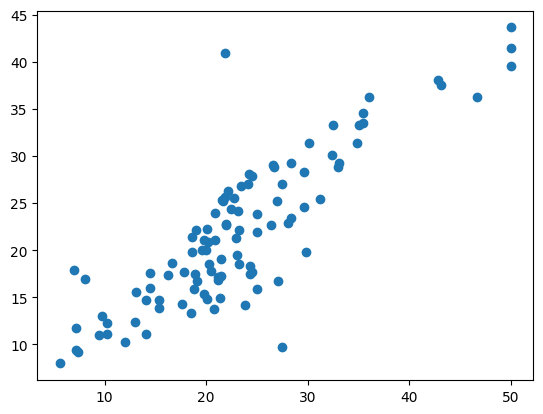

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(test_targets, y_predict)
plt.show()